# Example 2: The influence of weight combination in EEXE simulations

In this notebook, we will use `sampling_simulator` to investigate if weight combination is beneficial to weight equilibration in weight-updating EEXE simulations. The system and the reference free energy surface we use here are the same as those adopted in Example 1. Similarly, we note the following caveats:
- The sampling in the configurational space is completely ignored, which implies the following:
  - $\Delta U$ in the calculation of the acceptance ratio is always 0.
  - There are no exchanges between coordinates, so an EEXE simulation can be reprented by an ensemble of decoupled EXE simulations sampling different alchemical ranges.
- We have not implemented the $1/t$-variant of the Wang-Landau algorithm in `wang_landau_algorithm.py`.

## 1. Weight-updating EEXE simulations without weight combination

Note that instead of using `WL_Simulator` in `wang_landau_algorithm.py`, here we use `EnsembleEXE` in `ensemble_exe` that wrap around the functionalities in `WL_Simulator` to more easily access important attributes for analysis. Note that each replica here is still independent of other replicas since the sampling in the configuraitonal space is completely ignored. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 
from sampling_simulator.ensemble_exe import utils
from sampling_simulator.ensemble_exe import EnsembleEXE

rc('font', **{
        'family': 'sans-serif',
        'sans-serif': ['DejaVu Sans'],
        'size': 10,
    })
# Set the font used for MathJax - more on thiprint(images)
rc('mathtext', **{'default': 'regular'})
plt.rc('font', family='serif')

In [2]:
params_dict = {
    'n_sim': 4,
    's': 7,
    'n_steps': 500,
    'n_iters': 50,
    'wl_ratio': 0.8,
    'wl_scale': 0.7,
    'wl_delta': 10,
    'wl_delta_cutoff': 0.001,
    'verbose': False,
    'w_combine': False
}

In [3]:
f_ref = np.array([
    0.0, 57.805215366068346, 112.49325354921746, 163.9053804543671, 211.1228680338599, 254.58059732433938, 295.5660812208014,
    334.6531501257331, 371.45476696195874, 406.65593569265764, 439.2891881651442, 469.42891547180665, 497.15580279170484,
    522.4463901739871, 545.4157353241036, 566.0988033555478, 584.5719734781715, 600.4976380135653, 614.3116862505102, 625.6622986339568,
    634.9000108527418, 639.2141393579959, 643.3695667349867, 647.2981063000773, 650.9040500232999, 652.5280053311945, 653.9774650452159,
    655.178901008137, 656.0135314031018, 656.2533557264542, 656.2030286485515, 655.7434099493724, 654.7837017140891, 653.4171450203427,
    651.8897886531751, 650.4268292093915, 649.155734577982, 647.8279229679827, 646.8756268046341, 645.4731180684097,
], dtype=float)

In [4]:
rmse, cost = [], []
for i in range(1):
    section_title = f'\nReplicate {i + 1}:'
    print(section_title)
    print('=' * (len(section_title) - 1))
    EEXE_simulator = EnsembleEXE(params_dict, f_ref)
    EEXE_simulator.run()
    rmse.append(EEXE_simulator.rmse)
    cost.append(np.max(EEXE_simulator.equil_time_all) * EEXE_simulator.n_sim)
    
print(f'\n\nComputational cost: {np.mean(cost):.0f} +/- {np.std(cost, ddof=1):.0f} A.U.')
print(f'RMSE for the whole-range alchemical weights: {np.mean(rmse):.4f} +/- {np.std(rmse, ddof=1):.3f} kT')


Replicate 1:

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]

Final Wang-Landau incrementors: [10.0, 10.0, 1.6807, 0.403536]

Final Wang-Landau incrementors: [10.0, 10.0, 0.57648, 0.197733]

Final Wang-Landau incrementors: [10.0, 1.17649, 0.197733, 0.096889]

Final Wang-Landau incrementors: [10.0, 0.403536, 0.138413, 0.096889]

Final Wang-Landau incrementors: [2.401, 0.197733, 0.096889, 0.067822]

Final Wang-Landau incrementors: [0.823543, 0.138413, 0.067822, 0.047476]

Final Wang-Landau incrementors: [0.282475, 0.067822, 0.047476, 0.033233]

Final Wang-Landau incrementors: [0.138413, 0.047476, 0.033233, 0.033233]

Final Wang-Landau incrementors: [0.096889, 0.033233, 0.033233, 0.023263]

Final Wang-Landau incrementors: [0.067822, 0.033233, 0.023263, 0.016284]

Final Wang-Landau incrementors: [0.047476, 0.023263, 0.023263, 0.016284]

Final Wang-Landau incrementors: [0.033233, 0.023263, 0.016284, 0.011399]

Final Wang-Landau incrementors: [0.033233, 0.016284, 0.016284, 0.01

/Users/Wei-TseHsu/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Wei-TseHsu/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Note that one can plot the following figures for analysis. Not that the histogram shown below was reset to 0 only a few hundreds steps before so the statistics might not be reprensentative. 

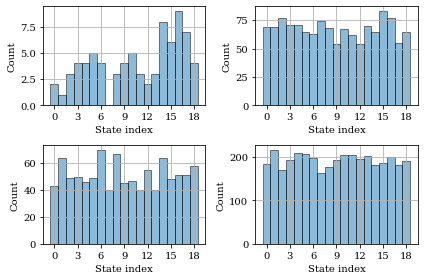

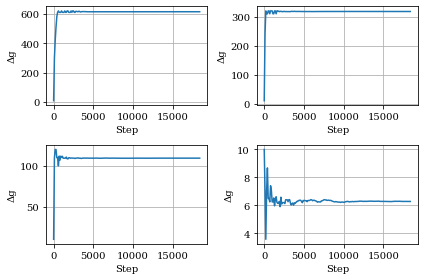

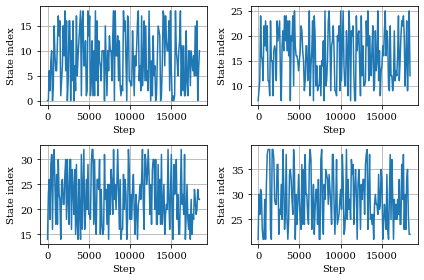

In [5]:
n_rows, n_cols = utils.get_subplot_dimension(EEXE_simulator.n_sim)

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    EEXE_simulator.simulators[i].plot_hist()
    plt.tight_layout()

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    EEXE_simulator.plot_timeseries(EEXE_simulator.simulators[i].dg, 'Δg')
    plt.tight_layout()

plt.figure()
for i in range(EEXE_simulator.n_sim):
    plt.subplot(n_rows, n_cols, i + 1)
    start_idx = i * EEXE_simulator.s
    EEXE_simulator.plot_timeseries(np.array(EEXE_simulator.simulators[i].traj) + start_idx, 'State index')
    plt.tight_layout()

## 2. Weight-updating EEXE simulations with weight combination

In [6]:
params_dict['w_combine'] = True
rmse, cost = [], []
for i in range(1):
    section_title = f'\nReplicate {i + 1}:'
    print(section_title)
    print('=' * (len(section_title) - 1))
    EEXE_simulator = EnsembleEXE(params_dict, f_ref)
    EEXE_simulator.run()
    rmse.append(EEXE_simulator.rmse)
    cost.append(np.max(EEXE_simulator.equil_time_all) * EEXE_simulator.n_sim)
    
print(f'\n\nComputational cost: {np.mean(cost):.0f} +/- {np.std(cost, ddof=1):.0f} A.U.')
print(f'RMSE for the whole-range alchemical weights: {np.mean(rmse):.4f} +/- {np.std(rmse, ddof=1):.3f} kT')


Replicate 1:

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.6807]

Final Wang-Landau incrementors: [10.0, 10.0, 1.17649, 0.57648]

Final Wang-Landau incrementors: [10.0, 10.0, 0.823543, 0.403536]

Final Wang-Landau incrementors: [10.0, 1.6807, 0.403536, 0.197733]

Final Wang-Landau incrementors: [10.0, 0.57648, 0.197733, 0.138413]

Final Wang-Landau incrementors: [2.401, 0.403536, 0.138413, 0.096889]

Final Wang-Landau incrementors: [0.57648, 0.282475, 0.096889, 0.067822]

Final Wang-Landau incrementors: [0.282475, 0.138413, 0.067822, 0.033233]

Final Wang-Landau incrementors: [0.197733, 0.096889, 0.067822, 0.033233]

Final Wang-Landau incrementors: [0.138413, 0.067822, 0.047476, 0.023263]

Final Wang-Landau incrementors: [0.096889, 0.047476, 0.047476, 0.023263]

Final Wang-Landau incrementors: [0.067822, 0.047476, 0.033233, 0.016284]

Final Wang-Landau incrementors: [0.047476, 0.047476, 0.023263, 0.016284]

Final Wang-Landau incrementors: [0.033233, 0.033233, 0.023263, 0.01139

/Users/Wei-TseHsu/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Wei-TseHsu/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


As a result, weight combination did not shorten the equilibration time for weight-updating EEXE simulations. 

## 3. Weight-updating EEXE simulations with weight combination and histogram correction

In [7]:
params_dict['hist_correction'] = True
rmse, cost = [], []
for i in range(1):
    section_title = f'\nReplicate {i + 1}:'
    print(section_title)
    print('=' * (len(section_title) - 1))
    EEXE_simulator = EnsembleEXE(params_dict, f_ref)
    EEXE_simulator.run()
    rmse.append(EEXE_simulator.rmse)
    cost.append(np.max(EEXE_simulator.equil_time_all) * EEXE_simulator.n_sim)
    
print(f'\n\nComputational cost: {np.mean(cost):.0f} +/- {np.std(cost, ddof=1):.0f} A.U.')
print(f'RMSE for the whole-range alchemical weights: {np.mean(rmse):.4f} +/- {np.std(rmse, ddof=1):.3f} kT')


Replicate 1:

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.00673795 0.00673795 1.
 1.         1.         1.         1.         1.         1.
 1.        ]
  Original histogram of states 0 to 18: [63.0, 58.0, 52.0, 47.0, 42.0, 38.0, 34.0, 30.0, 26.0, 23.0, 20.0, 16.0, 14.0, 11.0, 9.0, 7.0, 5.0, 3.0, 2.0]
  Corrected histogram of states 0 to 18: [63, 58, 52, 47, 42, 38, 34, 30, 26, 0, 0, 16, 14, 11, 9, 7, 5, 3, 2]

2:,  [1.00000000e+00 1.00000000e+00 1.48413159e+02 1.48413159e+02
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.55398553e-01
 4.01353950e-02 2.79619182e-01 1.98428456e-01]
  Original histogram of states 7 to 25: [48.0, 44.0, 40.0, 37.0, 34.0, 32.0, 29.0, 27.0, 25.0, 23.0, 21.0, 20.0, 19.0, 18.0, 17.0, 17.0,

 2.93236770e-02 9.04222506e-03 7.45205694e-01]
  Original histogram of states 14 to 32: [191, 52, 26, 77, 27, 26, 26, 27, 26, 27, 26, 26, 26, 27, 26, 26, 27, 27, 26]
  Corrected histogram of states 14 to 32: [191, 52, 728, 77, 0, 0, 0, 0, 10, 0, 1, 3, 5, 0, 3, 5, 0, 0, 19]

2:,  [1.         0.0074318  0.20832554 0.37517851 0.07815927 0.04340192
 0.61248449 0.07815927 0.04340192 0.34011324 1.10297749 0.01338338
 0.01338338 0.01338338 0.01338338 0.01338338 0.01338338 0.01338338
 0.01338338]
  Original histogram of states 21 to 39: [164, 104, 128, 26736, 11021, 87, 110, 986, 3313, 31, 963, 2378, 2562, 2446, 2539, 2516, 2585, 2516, 2608]
  Corrected histogram of states 21 to 39: [164, 0, 26, 10030, 861, 3, 67, 77, 143, 10, 1062, 31, 34, 32, 33, 33, 34, 33, 34]


Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.00673795 1.         0.00673795 0.00673795 5.29449005 0.1888756
 5.29449005]
  Original histogram of states 0 to 18: [380, 374, 368, 363, 359, 354, 350, 346, 290, 19573, 2911377, 18009, 21651, 9708, 458224197, 8820, 355214, 8784, 108997283775284]
  Corrected histogram of states 0 to 18: [380, 374, 368, 363, 359, 354, 350, 346, 290, 19573, 2911377, 18009, 145, 9708, 3087490, 59, 1880676, 1659, 577085034476477]

2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.48413159e+02 1.00000000e+00 1.48413159e+02
 1.48413159e+02 5.29449005e+00 1.88875603e-01 5.29449005e+00
 5.29449005e+00 3.56739933e-02 5.29449005e+00 2.41654782e+00
 2.65830008e-02 2.41654782e+00 2.41654782e+00]
  Original histogram of states 7 to 25: [363, 7927, 6119, 105, 15609,

/Users/Wei-TseHsu/Documents/Life_in_CU_Bouler/Research_in_Shirts_Lab/Code_development/GitHub/sampling_simulator/sampling_simulator/ensemble_exe.py:126: RuntimeWarning: invalid value encountered in cast
  self.simulators[i].hist = (self.simulators[i].hist * np.exp(-(weights_modified[i] - weights[i]))).astype(int)  # noqa: E501



  Original histogram of states 14 to 32: [480, 27, 807, 158, 185, 27, 8217, 27, 28, 26, 27, 100, 30, 29, 26, 28, 32, 95, 31]
  Corrected histogram of states 14 to 32: [480, 21215, 807, 158, 185, 4007, 1219510, 4007, 6150, 1761, 65, 48129, 54, 4303, 203, 4155, 4749, 82339, 4600]

2:,  [ 1.          0.45642693  4.8001796   0.17124158  0.09508539 25.41310536
  0.30835918  5.84002455  0.30835918  0.30835918  0.05280101  0.30835918
  0.30835918  0.30835918  0.30835918  0.30835918  0.30835918  0.30835918
  0.30835918]
  Original histogram of states 21 to 39: [459, 11582650, 288853303, 6616050, 20560, 741, 10457, 994771911, 9838489, 3468, 1559636, 1197959, 1258773, 1219096, 1238922, 1238625, 1239260, 1219105, 1239260]
  Corrected histogram of states 21 to 39: [459, 5286633, 1386547731, 1132942, 1954, 18831, 3224, 5809492378, 3033788, 1069, 82350, 369401, 388154, 375919, 382032, 381941, 382137, 375922, 382137]


Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram 



Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.48413159e+02 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 2.80316249e+01 2.80316249e+01 3.56739933e-02]
  Original histogram of states 0 to 18: [670, 664, 659, 653, 649, 644, 640, 636, 1040291824, 431745804, -9223372036854775782, 397266904, 3785924, 31824652811, 458251505, 12704, 219325446541, 254136, -9223372036854775781]
  Corrected histogram of states 0 to 18: [670, 664, 659, 653, 649, 644, 640, 636, 1040291824, 64076758700, -9223372036854775808, 397266904, 3785924, 31824652811, 458251505, 12704, 6148048647261, 7123845, -329034512682016000]

2:,  [1.00000000e+00 1.00000000e+00 6.73794700e-03 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 2.80316249e+01 2

Performing histogram correction ...
2:,  [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.03567399
 1.        ]
  Original histogram of states 0 to 18: [749, 743, 738, 732, 728, 723, 719, 715, 1040291903, 64076758779, -9223372036854775782, 397266983, 3786003, 31824652891, 68010561264, 67430, 1161216394561, 37717295, -62146591937167366]
  Corrected histogram of states 0 to 18: [749, 743, 738, 732, 728, 723, 719, 715, 1040291903, 64076758779, -9223372036854775808, 397266983, 3786003, 31824652891, 68010561264, 67430, 1161216394561, 1345526, -62146591937167368]

2:,  [ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.03567399  1.
  1.          1.          1.         12.79438838  1.          0.67559376
  2.66539785]
  Original histogram of states 7 to 25: [730, 105, 79, 26, 211, 212, 132, 27, 4833, 32

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.73794700e-03 6.73794700e-03 6.73794700e-03 6.73794700e-03
 6.73794700e-03 4.53999298e-05 6.73794700e-03 6.73794700e-03
 8.57493910e-06 6.73794700e-03 6.73794700e-03]
  Original histogram of states 0 to 18: [828, 822, 816, 811, 807, 803, 798, 794, 22913954594497, 64076758858, -9223372036854771686, 397267062, 3786082, 31824652970, 68010561343, 67509, 912451322104216, 1345605, -62146591937167294]
  Corrected histogram of states 0 to 18: [828, 822, 816, 811, 807, 803, 798, 794, 154393011597, 431745805, -62146591937174424, 2676764, 25510, 1444837, 458251557, 454, 7824214521, 9066, -418740442646425]

2:,  [1.00000000e+00 1.48413159e+02 1.48413159e+02 1.48413159e+02
 1.48413159e+02 1.48413159e+02 2.20264658e+04 1.48413159e+02
 1.48413159e+02 4.16026201e+03 1.48413159e+02

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.48413159e+02 1.00000000e+00
 1.00000000e+00 1.00000000e+00 6.73794700e-03 1.88875603e-01
 1.88875603e-01 1.88875603e-01 5.29449005e+00]
  Original histogram of states 0 to 18: [933, 927, 922, 916, 912, 908, 904, 900, 154393011703, 64076770599, -9223372036854768614, 397271087, 562471678, 4723282817673, 68010565324, 2569, 1161216439070, 1349451, -62146591937170358]
  Corrected histogram of states 0 to 18: [933, 927, 922, 916, 912, 908, 904, 900, 154393011703, 64076770599, -9223372036854775808, 397271087, 562471678, 4723282817673, 458251584, 485, 219325454954, 254878, -329034512681956992]

2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 6.73794700e-03
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.48413159e+02
 1.88875603e-01 1.88875


Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 6.73794700e-03
 1.00000000e+00 1.00000000e+00 1.48413159e+02 5.29449005e+00
 1.88875603e-01 1.88875603e-01 5.29449005e+00]
  Original histogram of states 0 to 18: [1012, 1006, 1001, 995, 991, 986, 982, 979, 154393011782, 64076770678, -9223372036854775782, 397271166, 562471757, 700997324309681, 3087701, 3884, 1161216439237, 48176, -100652420928]
  Corrected histogram of states 0 to 18: [1012, 1006, 1001, 995, 991, 986, 982, 979, 154393011782, 64076770678, -9223372036854775808, 2676792, 562471757, 700997324309681, 458255459, 20563, 219325454985, 9099, -532903241159]

2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.48413159e+02 1.00000000e+00 1.00000000e+00 6.73794700e-03
 5.29449005e+00 1.88875603e-01 


Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.         28.03162489 28.03162489  1.
  1.        ]
  Original histogram of states 0 to 18: [1117, 1111, 1106, 1101, 1096, 1092, 1087, 1084, 154393011887, 64076770783, -62146591937174397, 2680664, 83478221964, 4723282817725, 3087754, 3945, 52719170, 93, -2217017106626730]
  Corrected histogram of states 0 to 18: [1117, 1111, 1106, 1101, 1096, 1092, 1087, 1084, 154393011887, 64076770783, -62146591937174400, 2680664, 83478221964, 4723282817725, 3087754, 110584, 1477803998, 92, -2217017106626478]

2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 2.80316249e+01 1.27263380e-03 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 2.19093

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.48413159e+02 6.73794700e-03
 5.29449005e+00 4.16026201e+03 6.73794700e-03]
  Original histogram of states 0 to 18: [1275, 1269, 1264, 1259, 1254, 1250, 1245, 1242, 3400732396435385, 1411384801641202, -62146591937174253, 2680822, 83478225849, 4723282817883, 3087911, 4000, 1477804155, 5546, -2821450907227]
  Corrected histogram of states 0 to 18: [1275, 1269, 1264, 1259, 1254, 1250, 1245, 1242, 3400732396435385, 1411384801641202, -62146591937174256, 2680822, 83478225849, 4723282817883, 458286626, 26, 7824219395, 23072813, -19010786673]

2:,  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 6.73794700e-03
 1.48413159e+02

Final Wang-Landau incrementors: [10.0, 10.0, 10.0, 1.17649]
Performing histogram correction ...
2:,  [  1.          1.          1.          1.          1.          1.
   1.          1.        148.4131591   1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.       ]
  Original histogram of states 0 to 18: [1354, 1348, 1343, 1338, 1333, 1329, 1325, 1321, 22913954645280, 1411384801641281, -62146591937174181, 2680901, 83478225928, 4723282817962, 10094435268251, 41021, 7824219585, 23073005, -19010786476]
  Corrected histogram of states 0 to 18: [1354, 1348, 1343, 1338, 1333, 1329, 1325, 1321, 3400732396439165, 1411384801641281, -62146591937174184, 2680901, 83478225928, 4723282817962, 10094435268251, 41021, 7824219585, 23073005, -19010786476]

2:,  [1.00000000e+00 6.73794700e-03 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1

TypeError: '>=' not supported between instances of 'NoneType' and 'NoneType'